# Opera Network Visualization

### By Gianluca Coletta & Tommaso Martinelli

In questo progetto è stata realizzata una visualizzazione dell'informazione relativa al dataset [Opera Network](http://mozart.diei.unipg.it/gdcontest/contest2022/topics.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from geopy.geocoders import Nominatim
import geojson
import folium
from folium.plugins import MarkerCluster
import squarify 
import matplotlib
from collections import Counter
from networkx.drawing.layout import bipartite_layout
import json
from pyvis.network import Network
from IPython.core.display import HTML
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
filepath = "opera-network.csv"
data = pd.read_csv(filepath)
data.drop("rism_id",axis=1,inplace=True)
data.head()

,composer,librettist,title,performance_year,placename
0,"Paisiello, Giovanni","Metastasio, Pietro",Achille in Sciro,1778,Sankt Petersburg
1,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1799,Venezia
2,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1808,Dresden
3,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1815,Hamburg
4,"Anfossi, Pasquale","Metastasio, Pietro",Adriano in Siria,1777,Padova


### Treemap

In questa sezione vengono mostrati tre differenti Treemap:
* Nel primo viene mostrato il numero di performance per ogni **compositore**
* Nel secondo viene mostrato il numero di performance per ogni **librettista**
* Nel terzo viene mostrato il numero di performance per ogni **città**

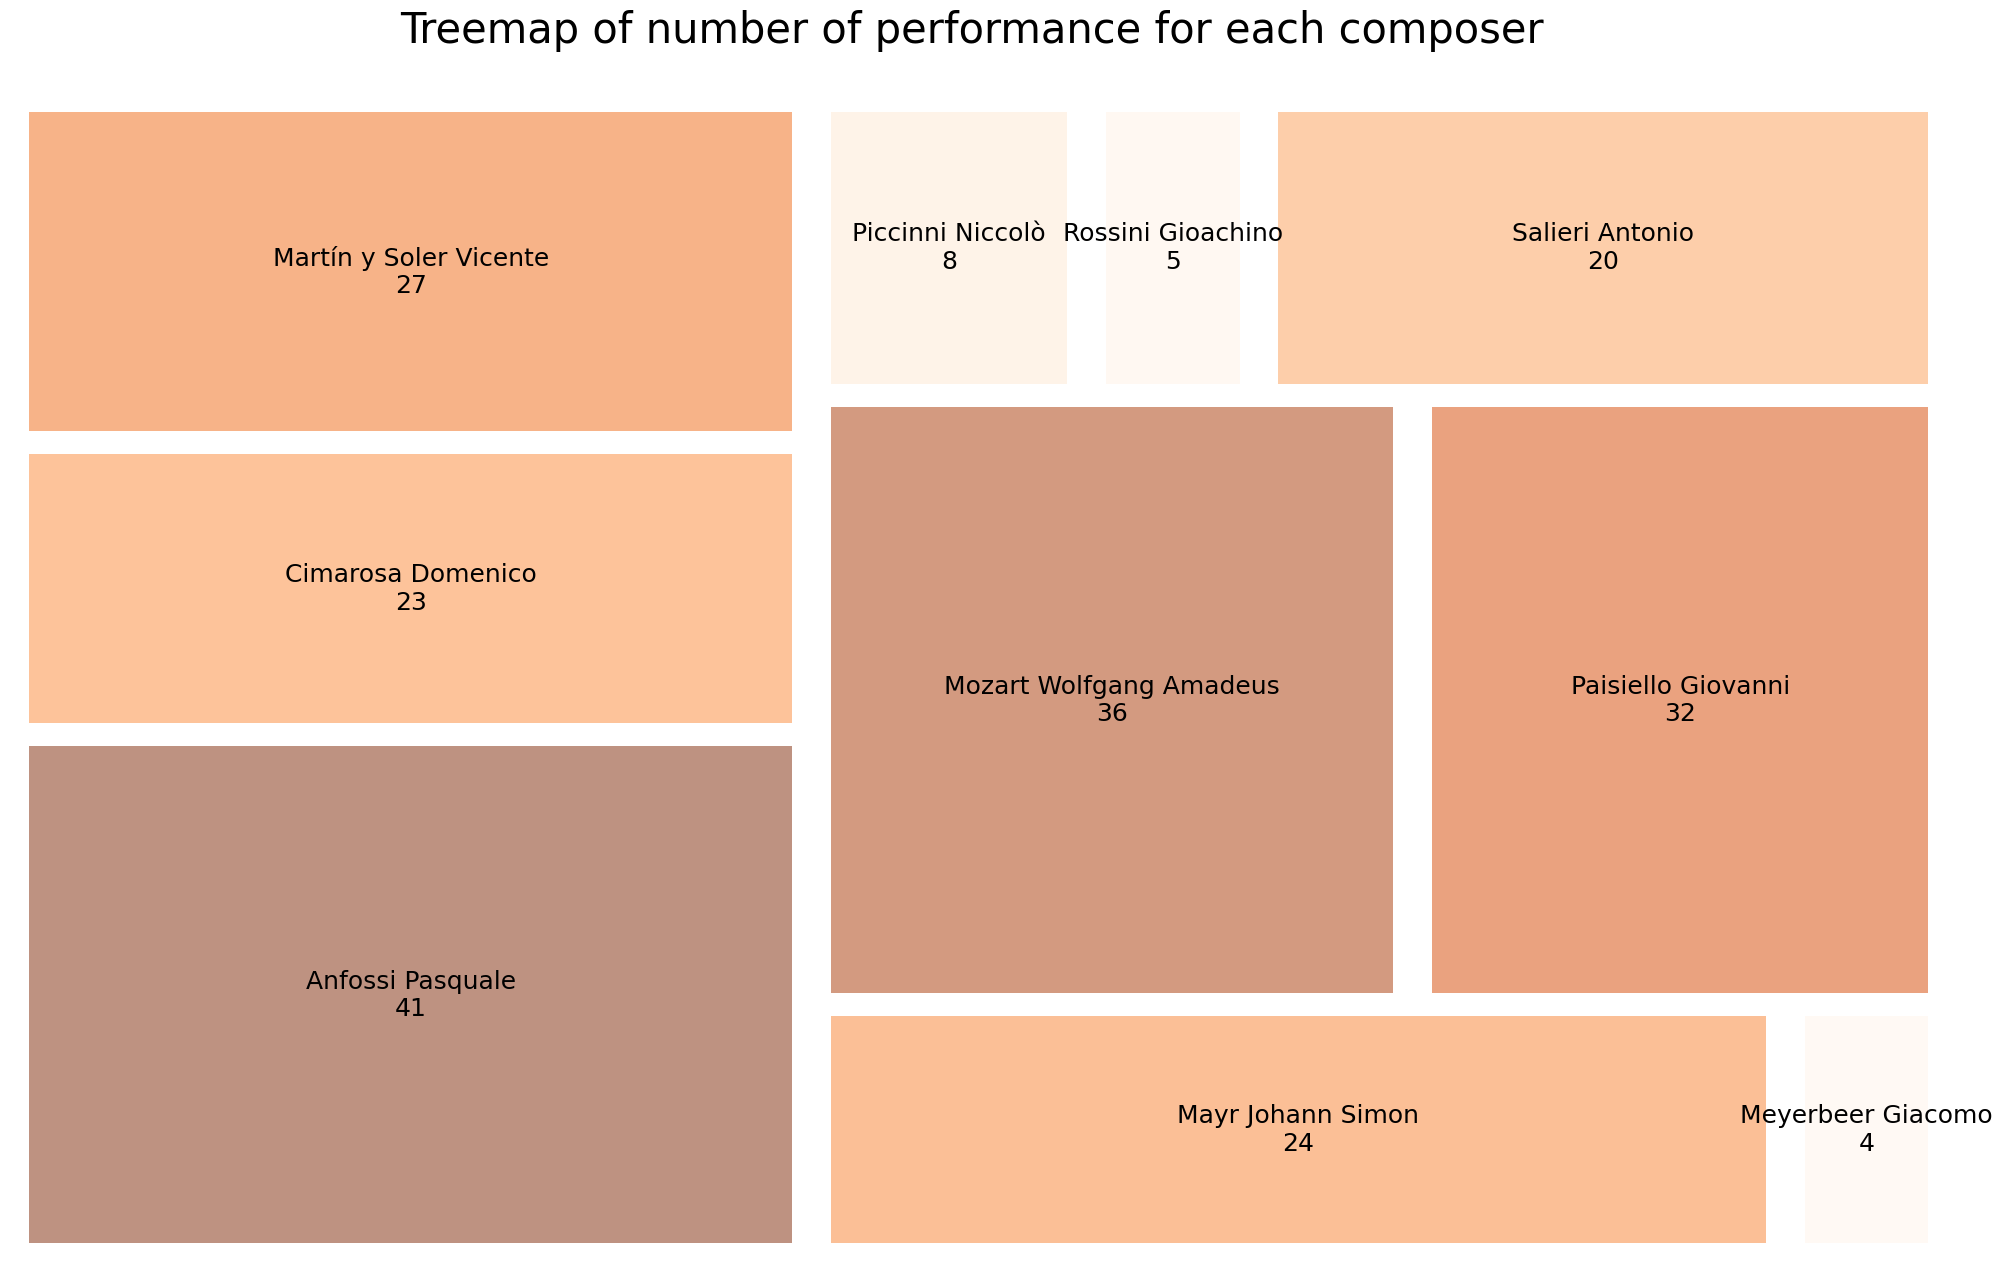

In [3]:
#Composer Treemap
data['composer'] = data['composer'].str.replace(",","")
df_grouped = data.groupby('composer').count()[['title']]
df_grouped = df_grouped.rename(columns={'title': 'number of performance'})

df_grouped.reset_index(inplace=True)

# Label and sizes
d = df_grouped['number of performance']
df_grouped["label"] = df_grouped['composer'].astype(str) +"\n"+ df_grouped["number of performance"].astype(str)
a = df_grouped['label']

# color
cmap = matplotlib.cm.Oranges
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(25,15))
squarify.plot(sizes=d,label=a, alpha=.5, pad=2, text_kwargs={'fontsize':18}, color = colors)
plt.title('Treemap of number of performance for each composer \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

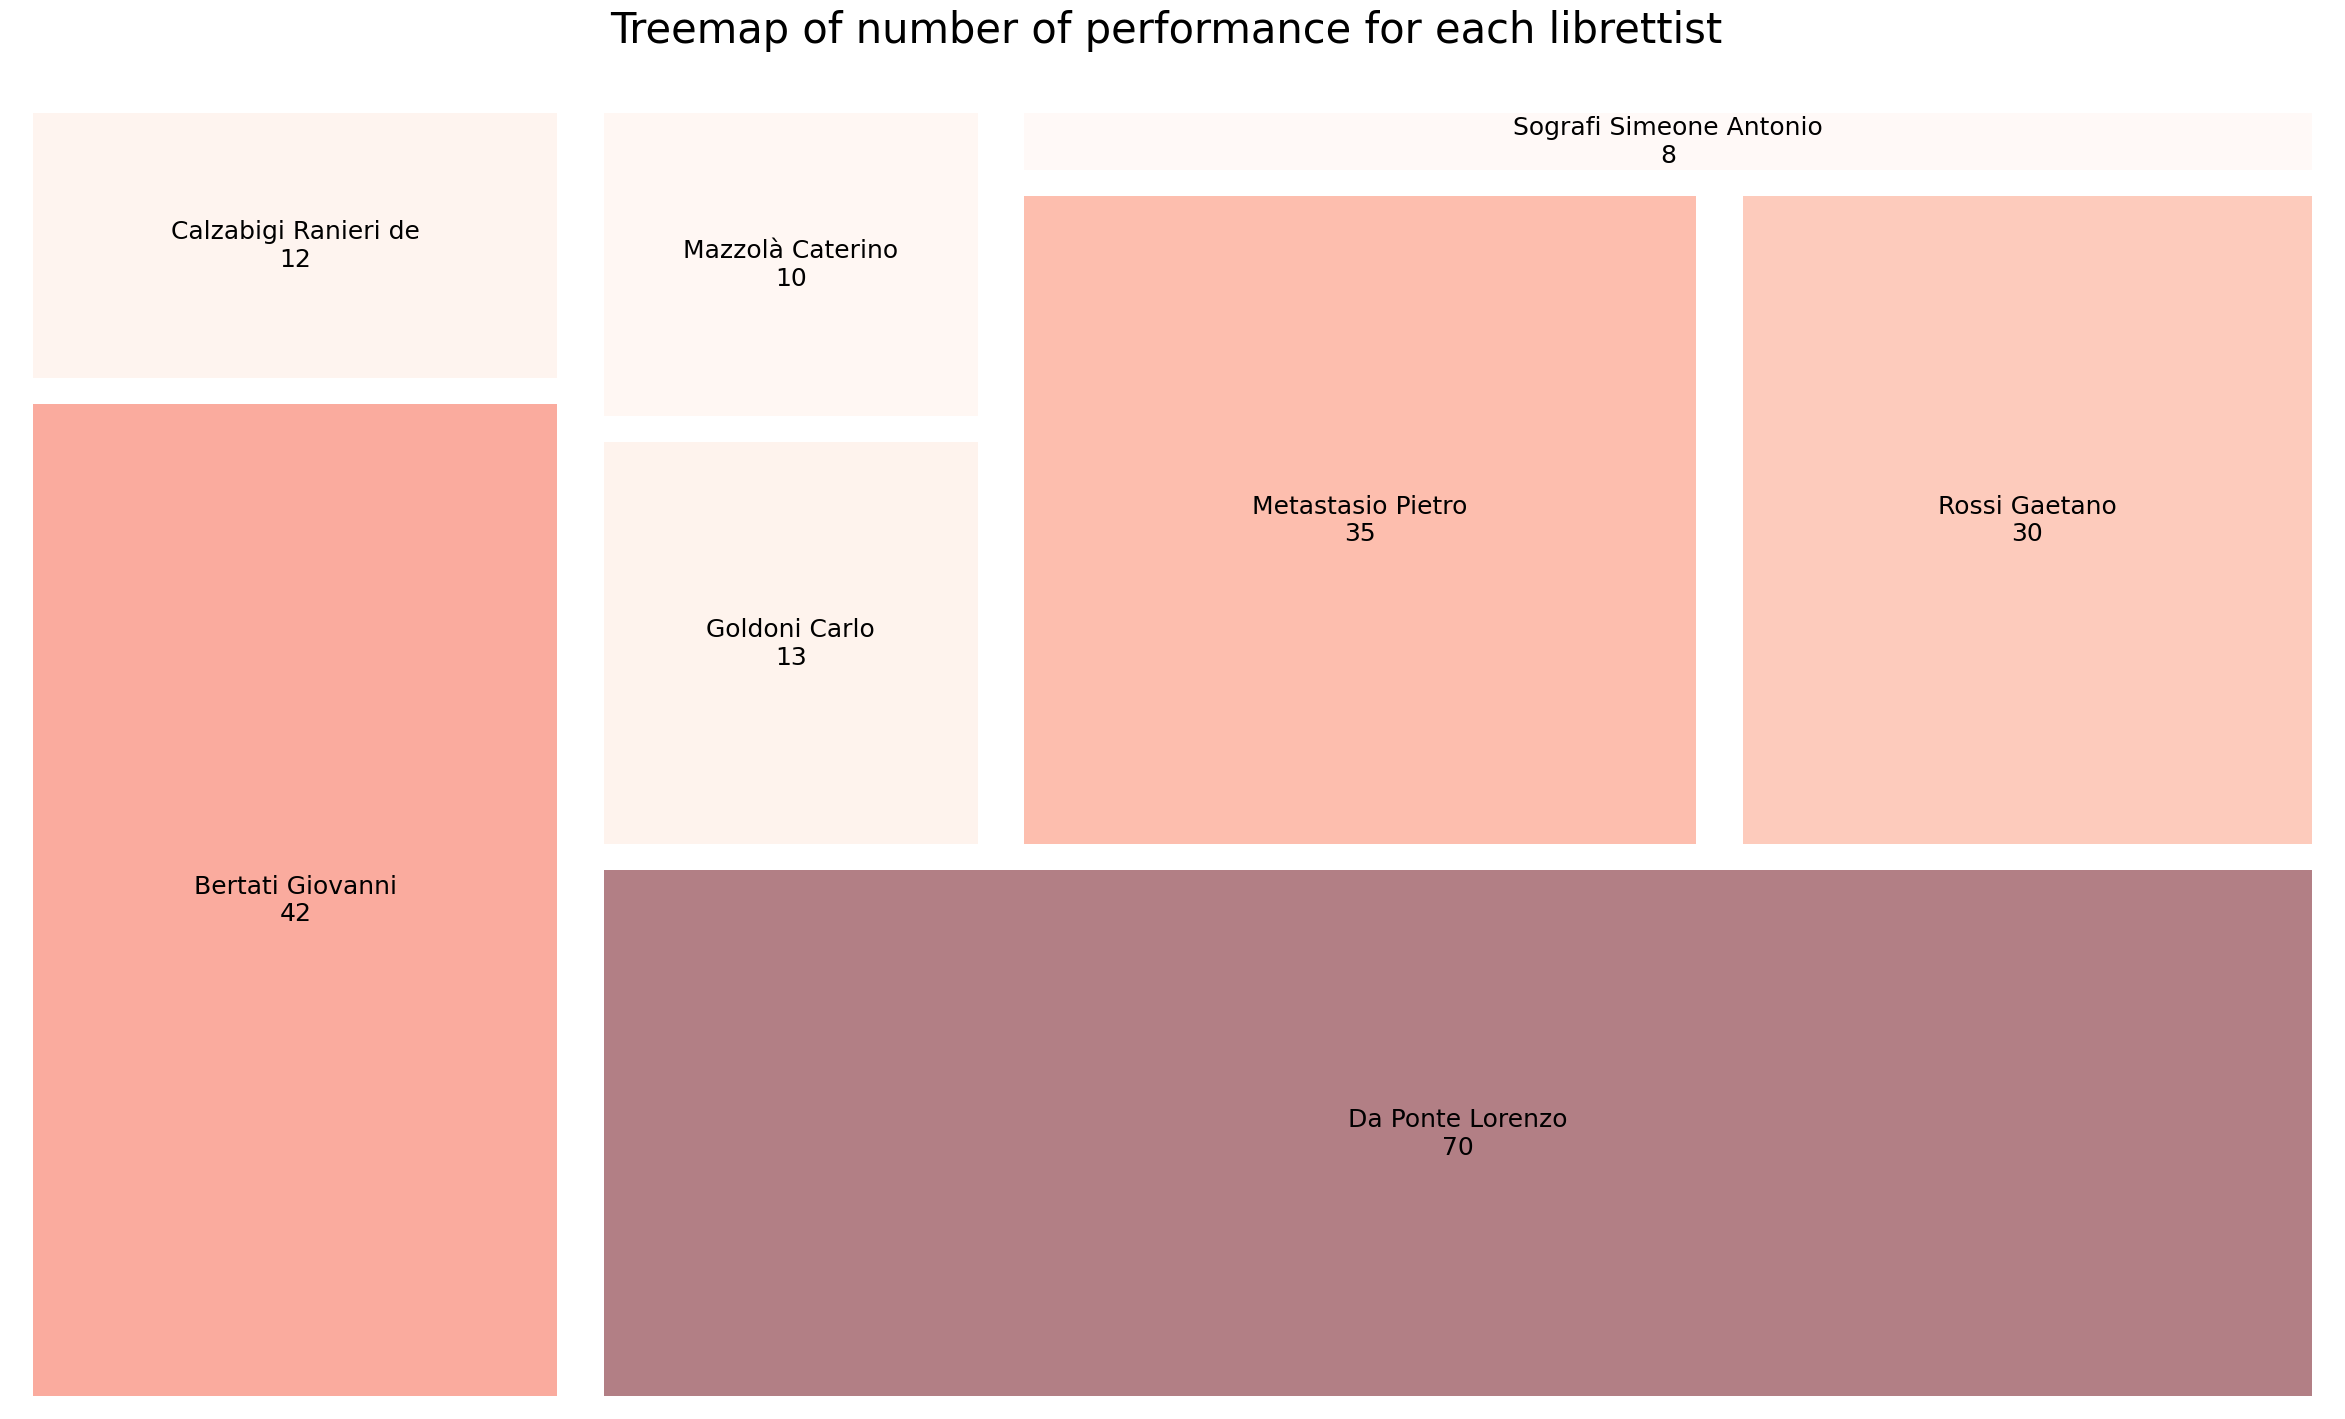

In [4]:
#Librettist Treemap
data['librettist'] = data['librettist'].str.replace(",","")
df_grouped1 = data.groupby('librettist').count()[['title']]
df_grouped1 = df_grouped1.rename(columns={'title': 'number of performance'})
df_grouped1.reset_index(inplace=True)

# Label and sizes
d = df_grouped1['number of performance']
df_grouped1["label"] = df_grouped1['librettist'].astype(str) +"\n"+ df_grouped1["number of performance"].astype(str)
a = df_grouped1['label']

# Colors
cmap = matplotlib.cm.Reds
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(30,17))
squarify.plot(sizes=d,label=a, alpha=.5, pad=2, text_kwargs={'fontsize':18}, color = colors)
plt.title('Treemap of number of performance for each librettist \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

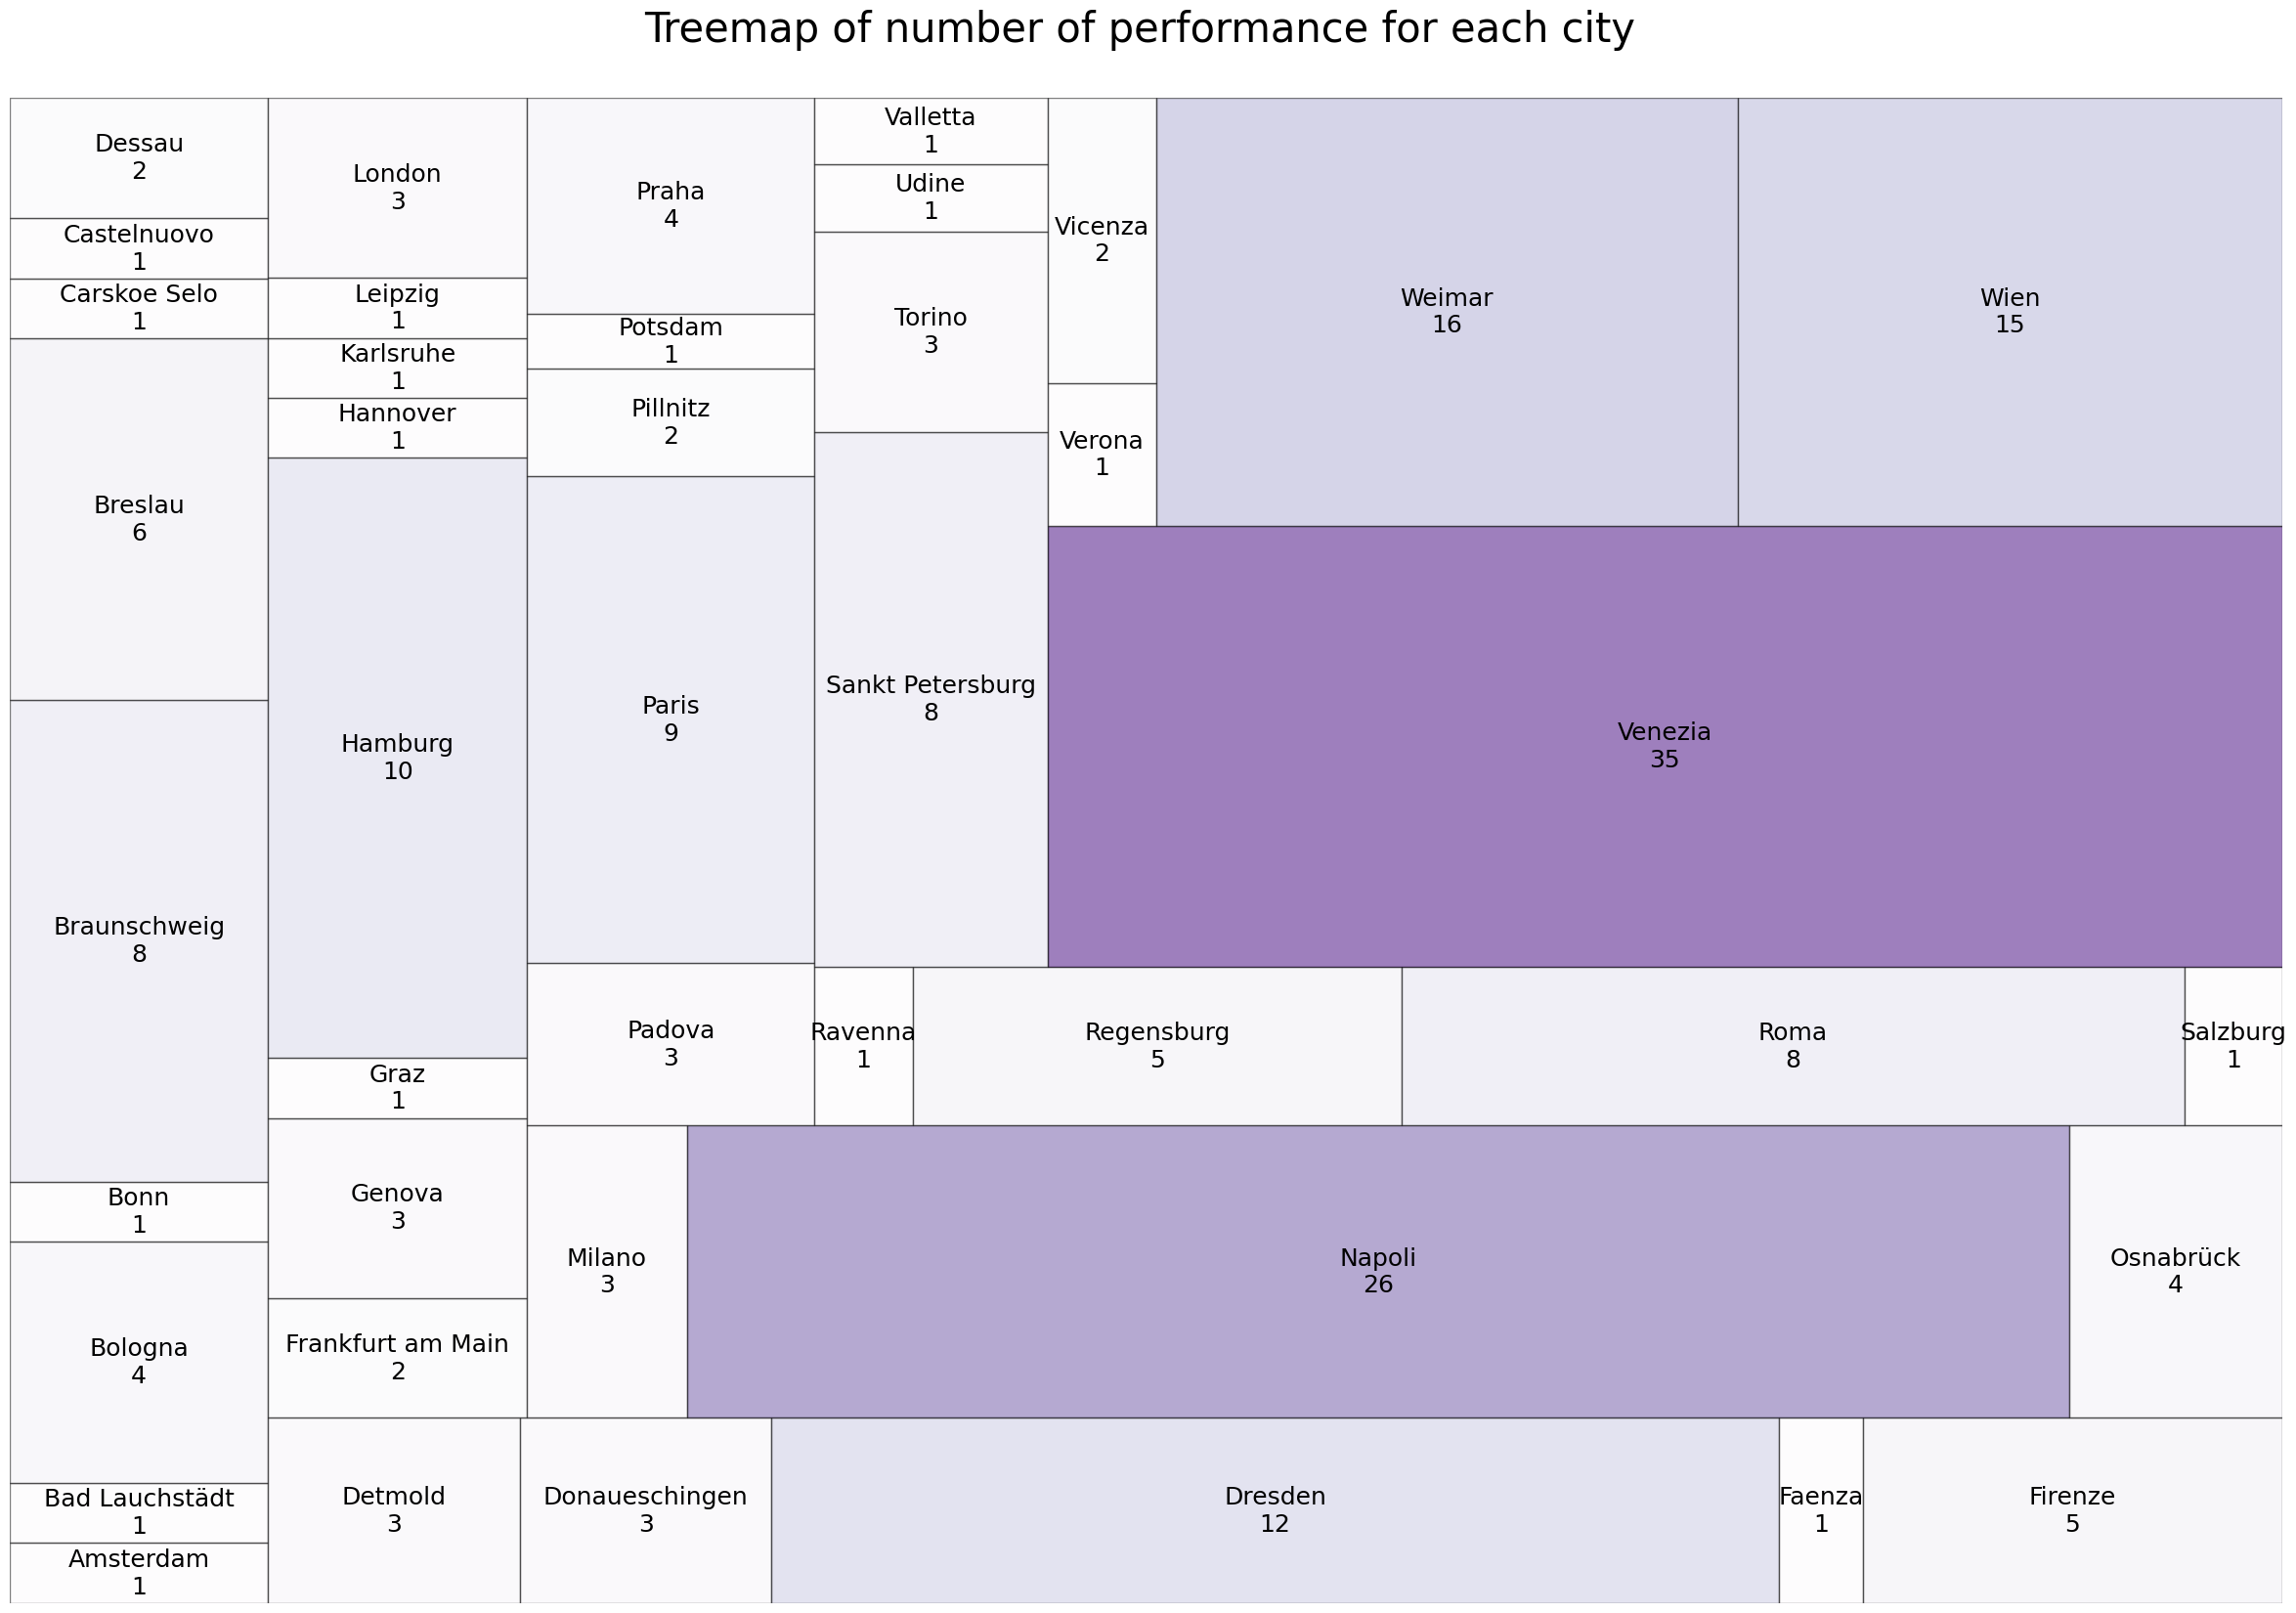

In [5]:
#Title Treemap
df_grouped2 = data.groupby('placename').count()[['title']]
df_grouped2 = df_grouped2.rename(columns={'title': 'number of performance'})

df_grouped2.reset_index(inplace=True)

 
# Label and sizes
d = df_grouped2['number of performance']
df_grouped2["label"] = df_grouped2['placename'].astype(str) +"\n"+ df_grouped2["number of performance"].astype(str)
a = df_grouped2['label']

# Colors
cmap = matplotlib.cm.Purples
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(30,20))
squarify.plot(sizes=d,label=a, alpha=.5, text_kwargs={'fontsize':18}, color = colors, bar_kwargs=dict(linewidth=1, edgecolor="#000000"))
plt.title('Treemap of number of performance for each city \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

### Bar Plot
In questa sezione vengono mostrati due Bar Plot:
* Nel primo viene mostrato il numero di performance per ogni **anno**, dove l'ascissa corrisponde all'anno e l'ordinata corrisponde al numero di performance
* Nel secondo viene mostrato il numero di performance per ogni **Opera**, dove l'ascissa corrisponde al nome dell'Opera e l'ordinata corrisponde al numero di performance

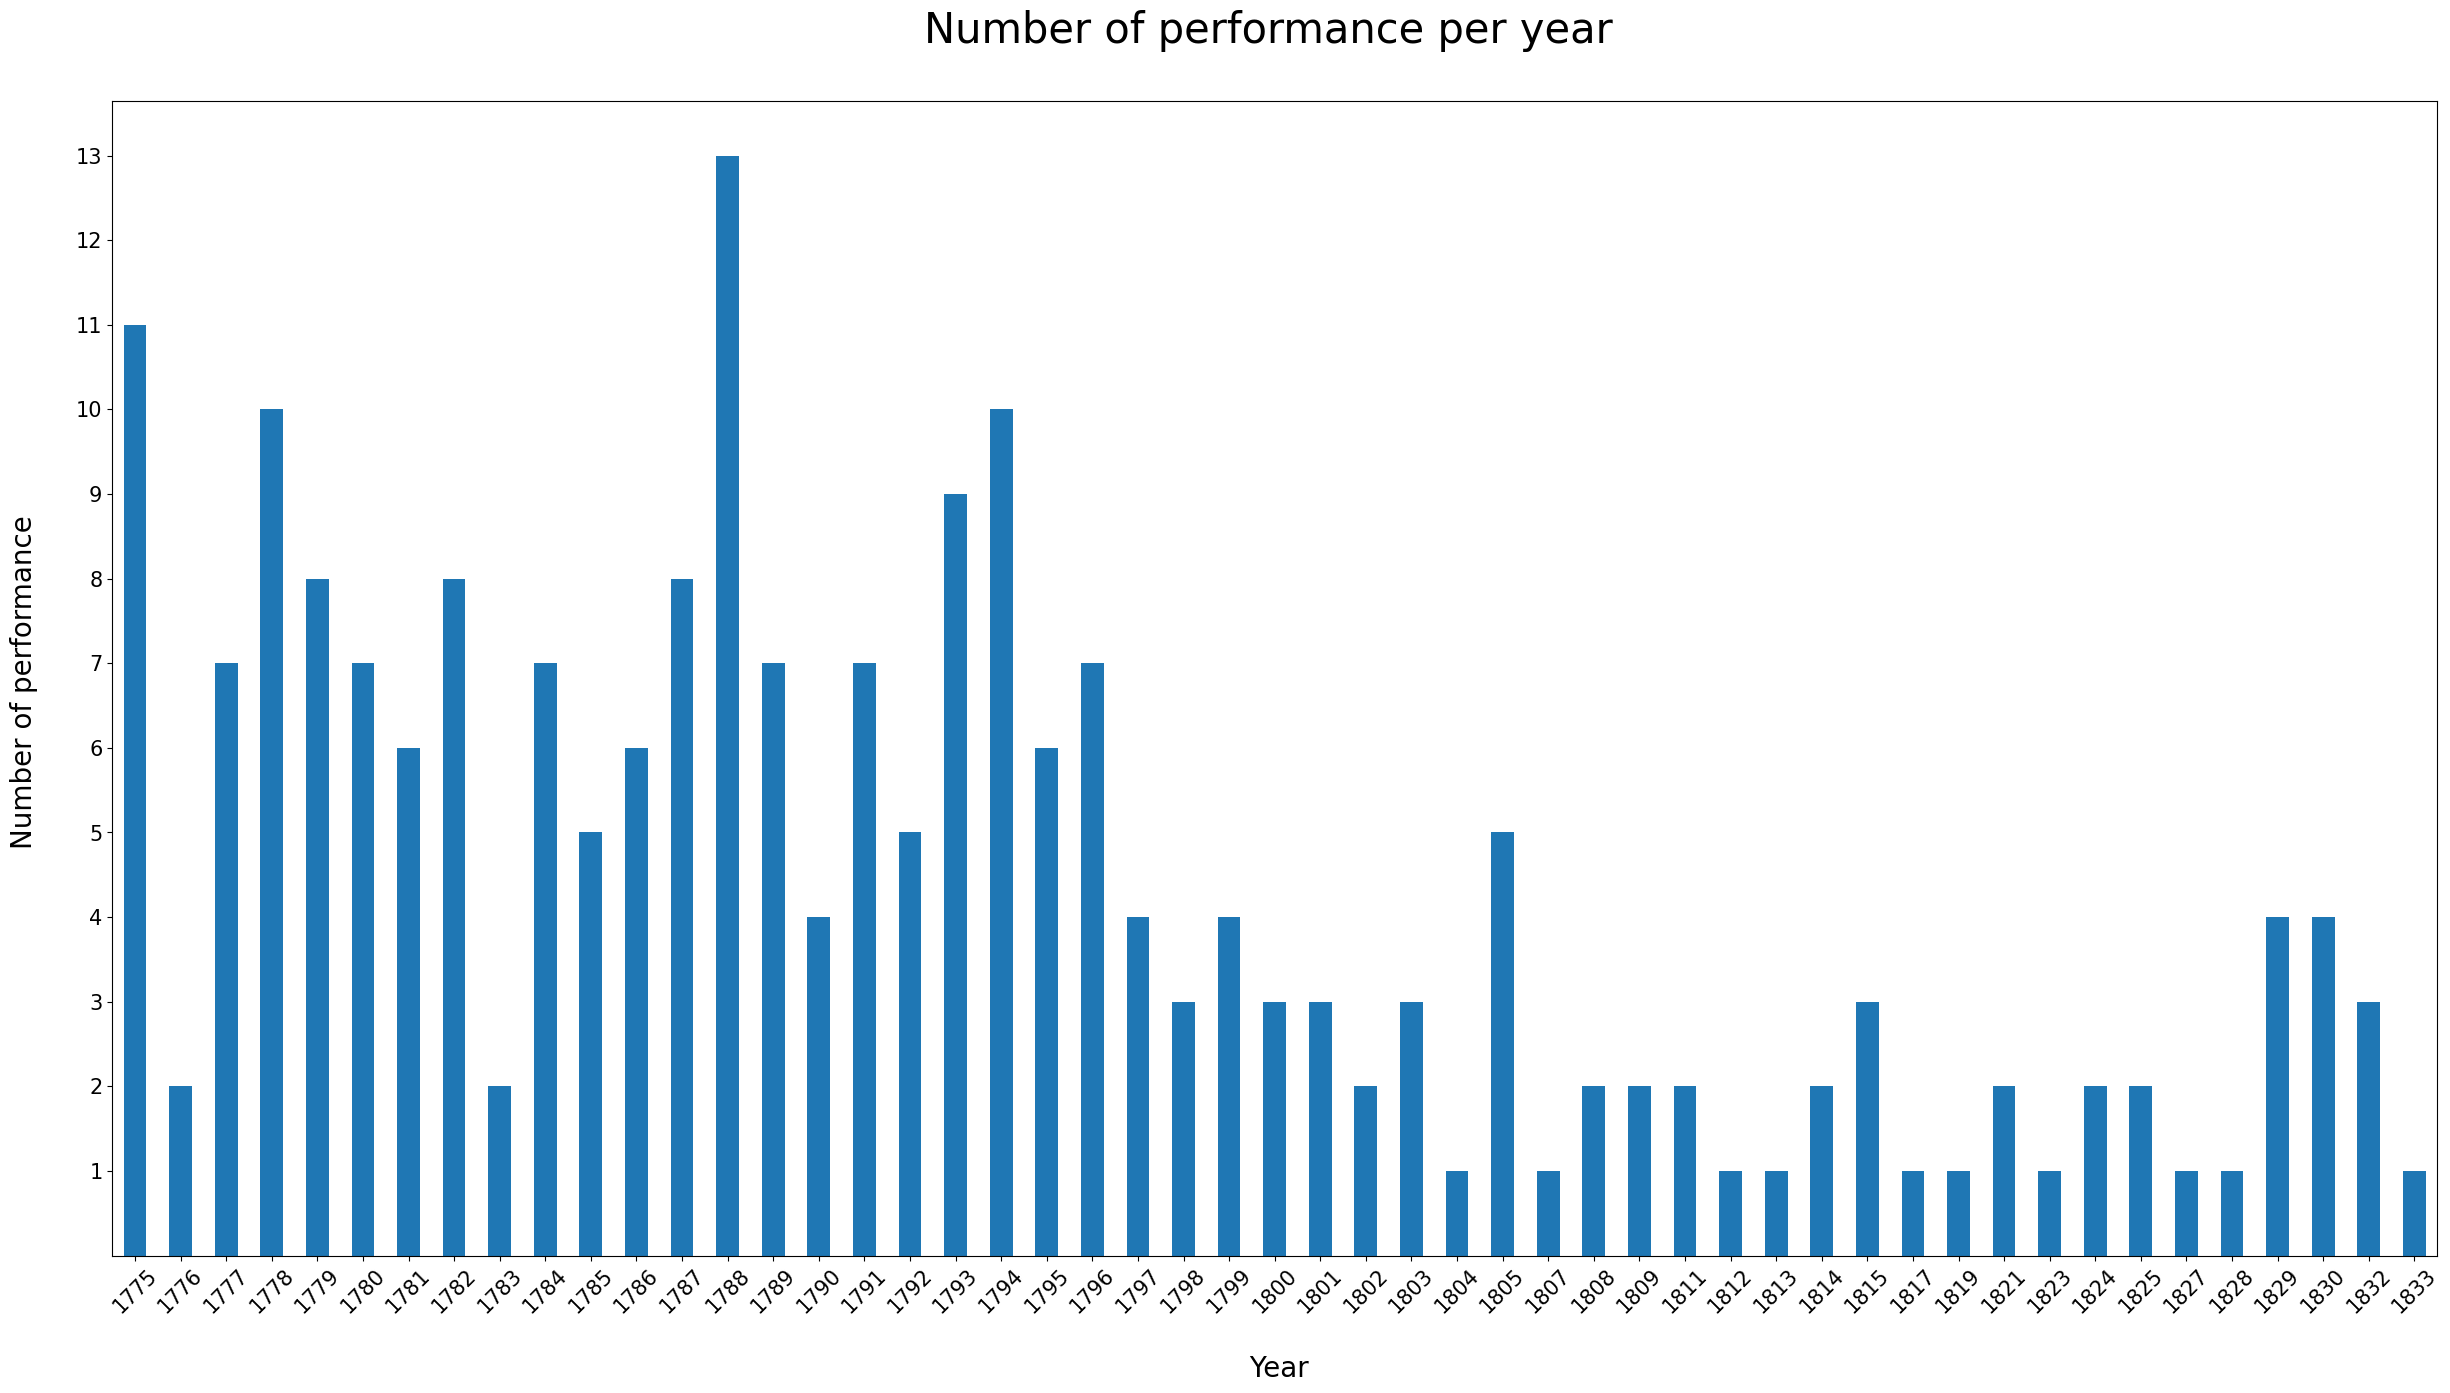

In [6]:
#performance per year visualization
performance_year = data.groupby('performance_year').size()

plt.figure(figsize=(30, 15))

performance_year.plot(kind='bar')

plt.xticks(rotation=45)
plt.yticks(np.arange(min(performance_year), max(performance_year)+1, 1))

plt.setp(plt.gca().get_xticklabels(), fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)

plt.title('Number of performance per year \n',fontdict={'fontsize': 30})
plt.xlabel('\n Year', fontdict={'fontsize': 20})
plt.ylabel('Number of performance \n', fontdict={'fontsize': 20})

plt.show()

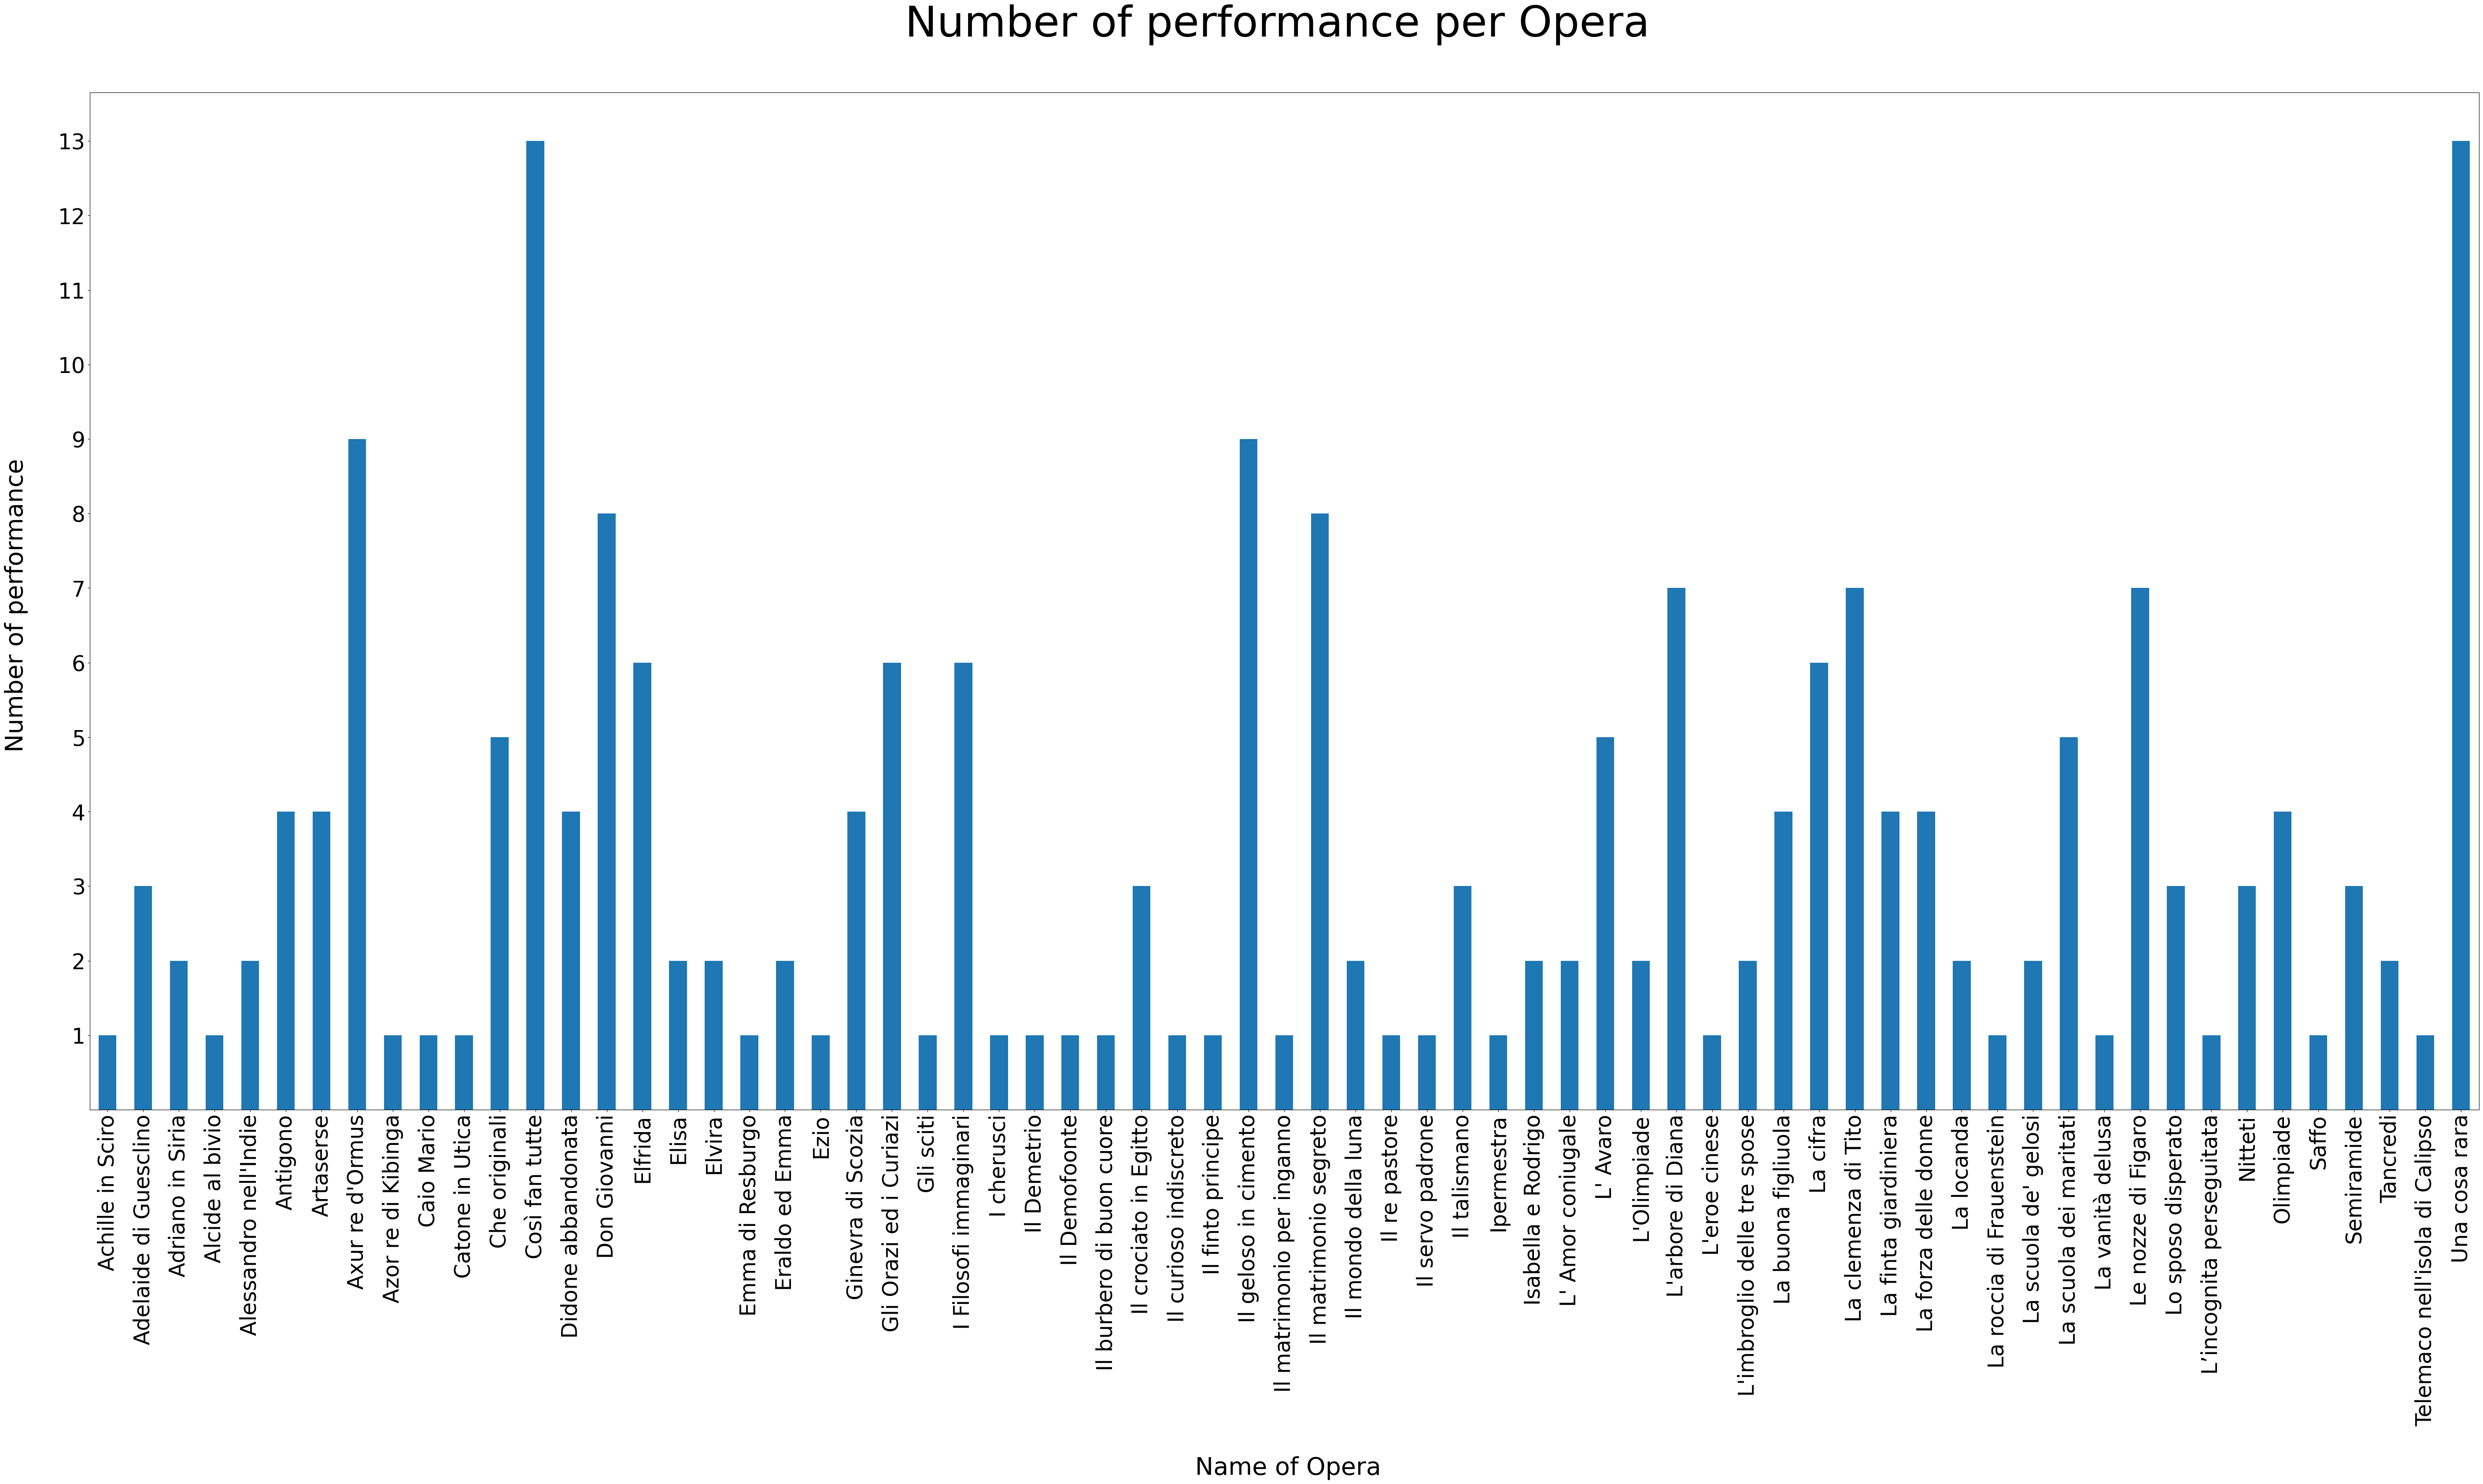

In [7]:
#Title visualization
title = data.groupby('title').size()

plt.figure(figsize=(70, 30))

# crea un grafico a barre
title.plot(kind='bar')

plt.yticks(np.arange(min(title), max(title)+1, 1))

plt.setp(plt.gca().get_xticklabels(), fontsize=35)
plt.setp(plt.gca().get_yticklabels(), fontsize=35)

plt.title('Number of performance per Opera \n',fontdict={'fontsize': 70})
plt.xlabel('\n Name of Opera', fontdict={'fontsize': 40})
plt.ylabel('Number of performance \n', fontdict={'fontsize': 40})

plt.show()

### Matrix Plot
In questa sezione vengono mostrati tre Matrix Plot differenti:
* Nel primo viene mostrato il numero di collaborazioni tra **librettista** e **compositore**
* Nel secondo viene mostrato il numero di performance di ogni **compositore** in ogni **città**
* Nel terzo viene mostrato il numero di performance di ogni **librettista** in ogni **città**

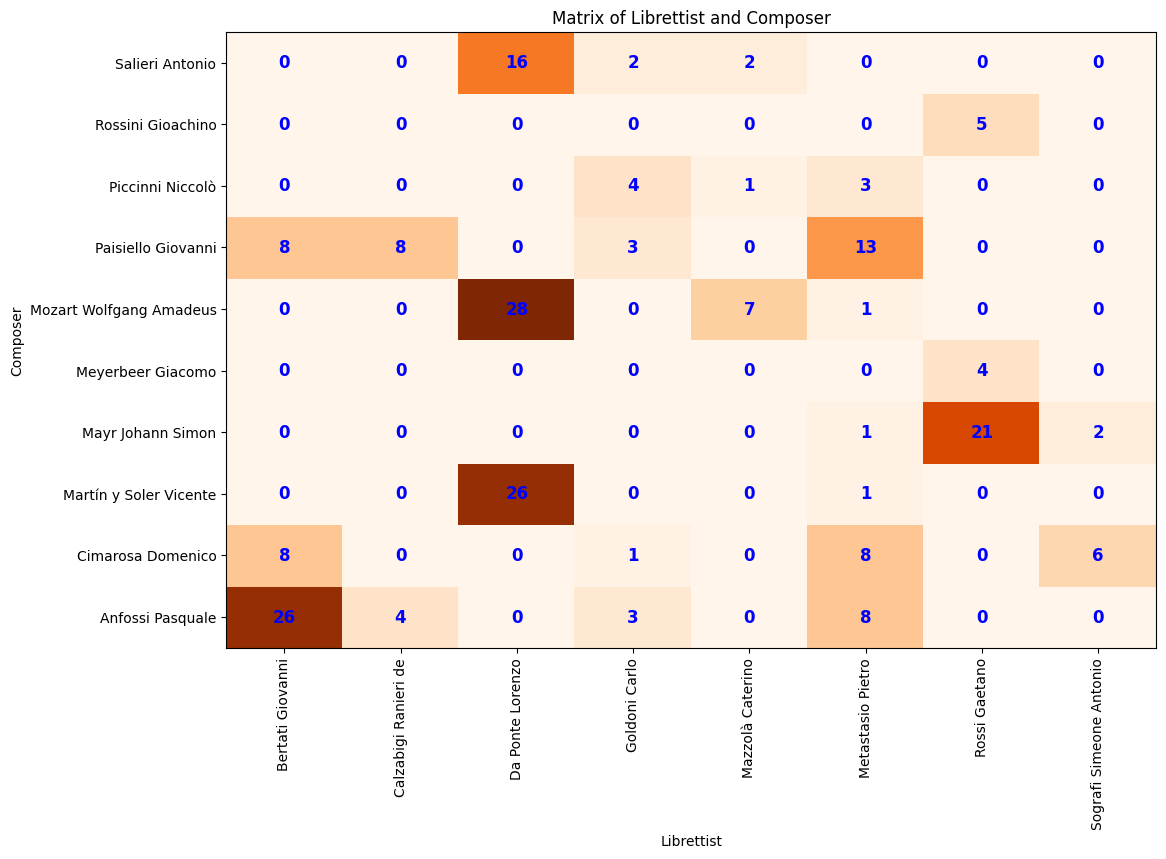

In [8]:
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
matrix = counts.pivot_table(values='counts', index='composer', columns='librettist', fill_value=0)
plt.figure(figsize=(12, 8))
plt.title("Matrix of Librettist and Composer")
plt.xlabel("Librettist")
plt.ylabel("Composer")
plt.pcolor(matrix, cmap='Oranges')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

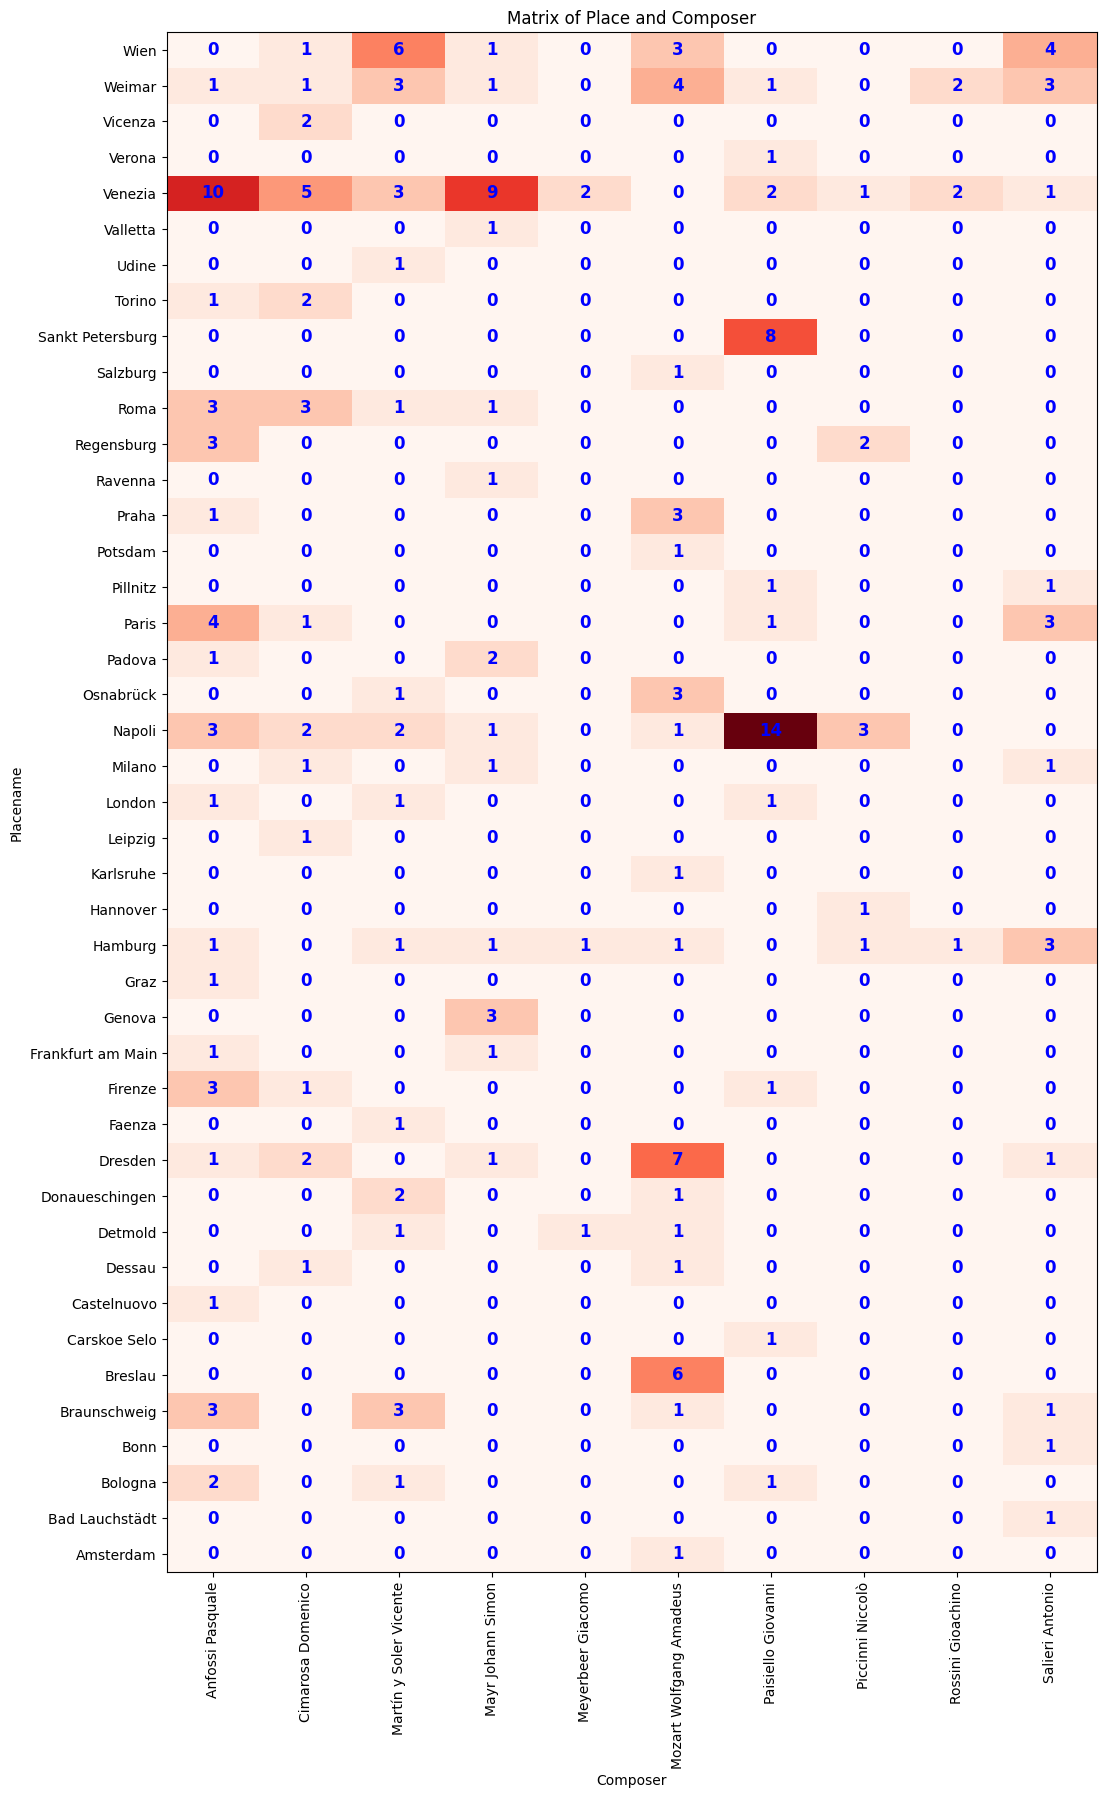

In [9]:
grouped_data = data.groupby(by=['placename','composer'])
counts = grouped_data.size().reset_index(name='counts')
matrix = counts.pivot_table(values='counts', index='placename', columns='composer', fill_value=0)
plt.figure(figsize=(12, 20))
plt.title("Matrix of Place and Composer")
plt.xlabel("Composer")
plt.ylabel("Placename")
plt.pcolor(matrix, cmap='Reds')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

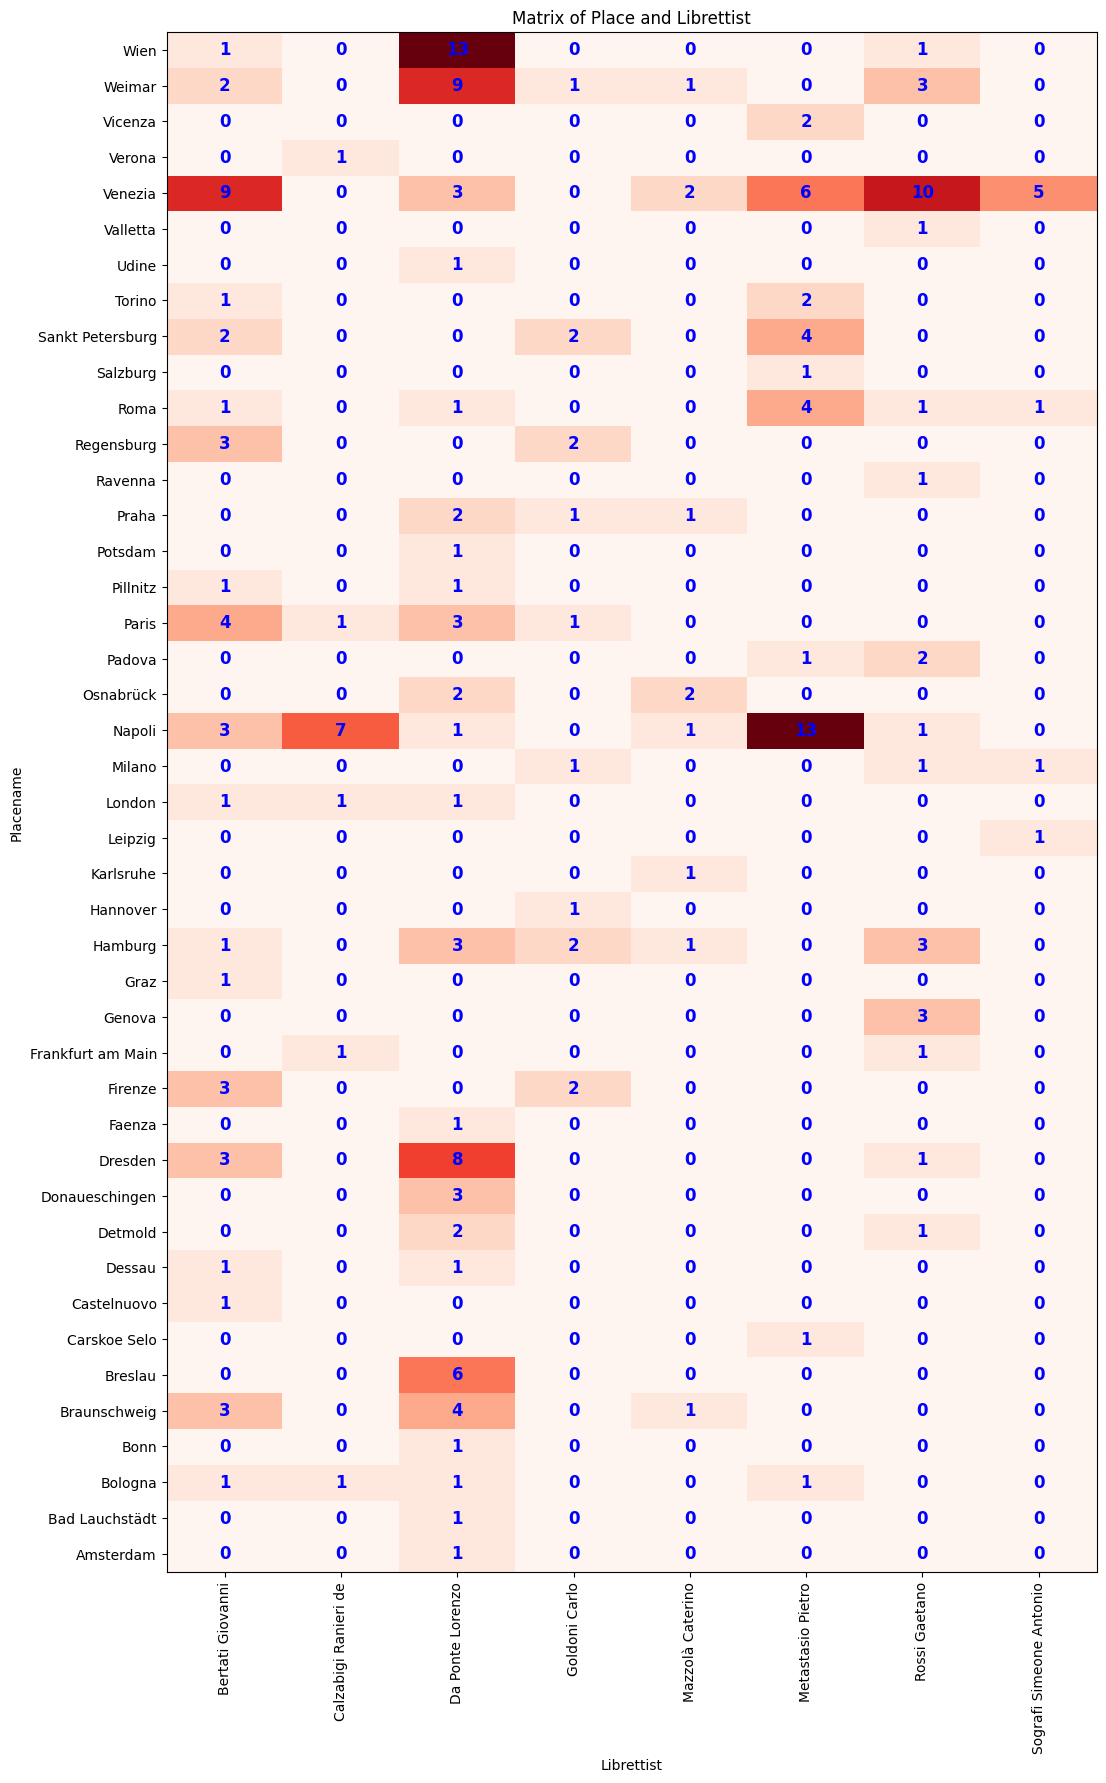

In [10]:
grouped_data = data.groupby(by=['placename','librettist'])
counts = grouped_data.size().reset_index(name='counts')
matrix = counts.pivot_table(values='counts', index='placename', columns='librettist', fill_value=0)
plt.figure(figsize=(12, 20))
plt.title("Matrix of Place and Librettist")
plt.xlabel("Librettist")
plt.ylabel("Placename")
plt.pcolor(matrix, cmap='Reds')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

### Bipartite Graph

In questa sezione viene mostrato un grafo bipartito tra i **librettisti** e i **compositori**. Gli archi rappresentano le varie collaborazioni, più l'arco è spesso più è alto il numero di collaborazioni tra le due entità. La grandezza del vertice è proporzionale al numero di performance effettuate da un librettista o da un compositore.


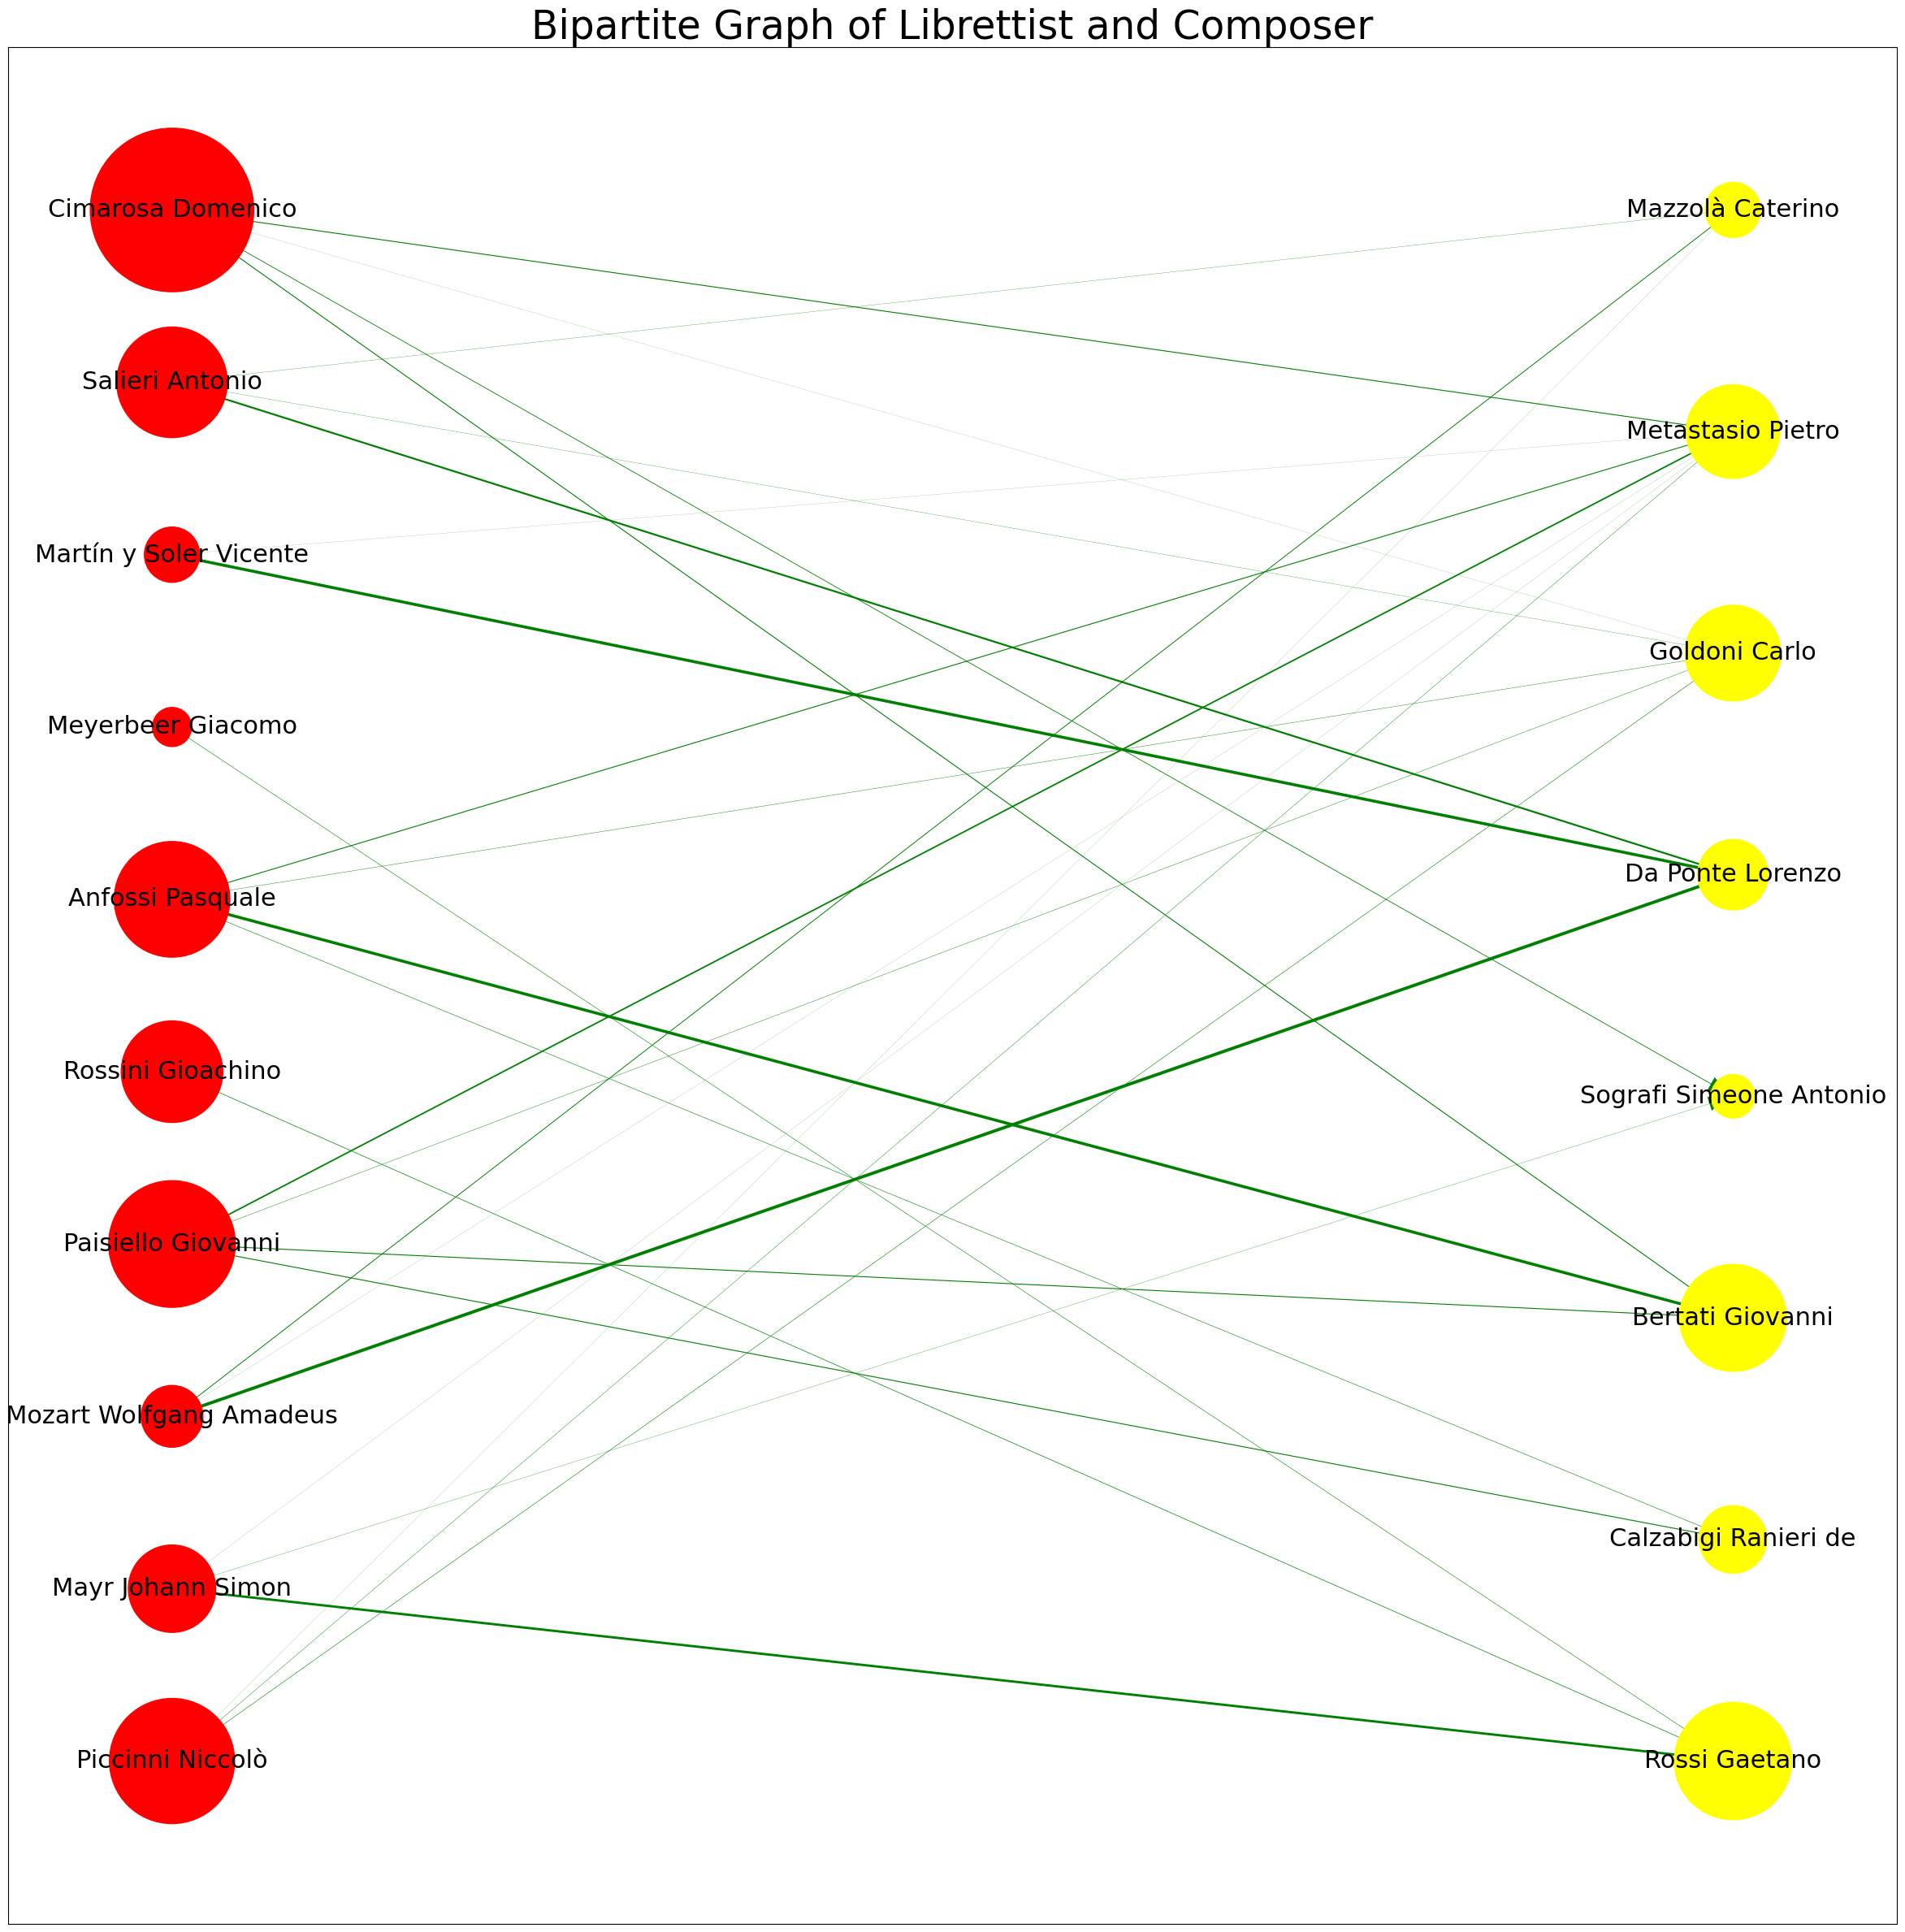

In [11]:
#bipartite graph
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
G = nx.DiGraph()

composer = data['composer']
librettist = data['librettist']
Edge = pd.DataFrame({"source":composer, "target":librettist})
for i, row in counts.iterrows():
    G.add_edge(row['composer'], row['librettist'], weight=row['counts'])
    
librettist_counts = Counter(data['librettist'])
composer_counts = Counter(data['composer'])

def scale_size(counts):
    return counts * 300 # or other scaling factor 

# Create lists of node sizes
librettist_sizes = list(map(scale_size, librettist_counts.values()))
composer_sizes = list(map(scale_size, composer_counts.values()))
node_sizes = librettist_sizes + composer_sizes

librettist_colors = {librettist: 'yellow' for librettist in data.librettist.unique()}
composer_colors = {composer: 'red' for composer in data.composer.unique()}
node_colors = [librettist_colors.get(node, composer_colors.get(node)) for node in G.nodes()]

plt.figure(figsize=(30, 30))
plt.title("Bipartite Graph of Librettist and Composer",size=35)
pos = bipartite_layout(G, composer)
nx.draw_networkx_edges(G, pos, width=[d['weight']/10 for (u, v, d) in G.edges(data=True)], edge_color='g', arrowsize=32)
labels = {node:node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size = 22)
plt.show()

### Radial Graph
In questa sezione viene mostrato un grafo radiale tra i **librettisti** e i **compositori**. Gli archi rappresentano le varie collaborazioni, più l'arco è spesso più è alto il numero di collaborazioni tra le due entità. La grandezza del vertice è proporzionale al numero di performance effettuate da un librettista o da un compositore.


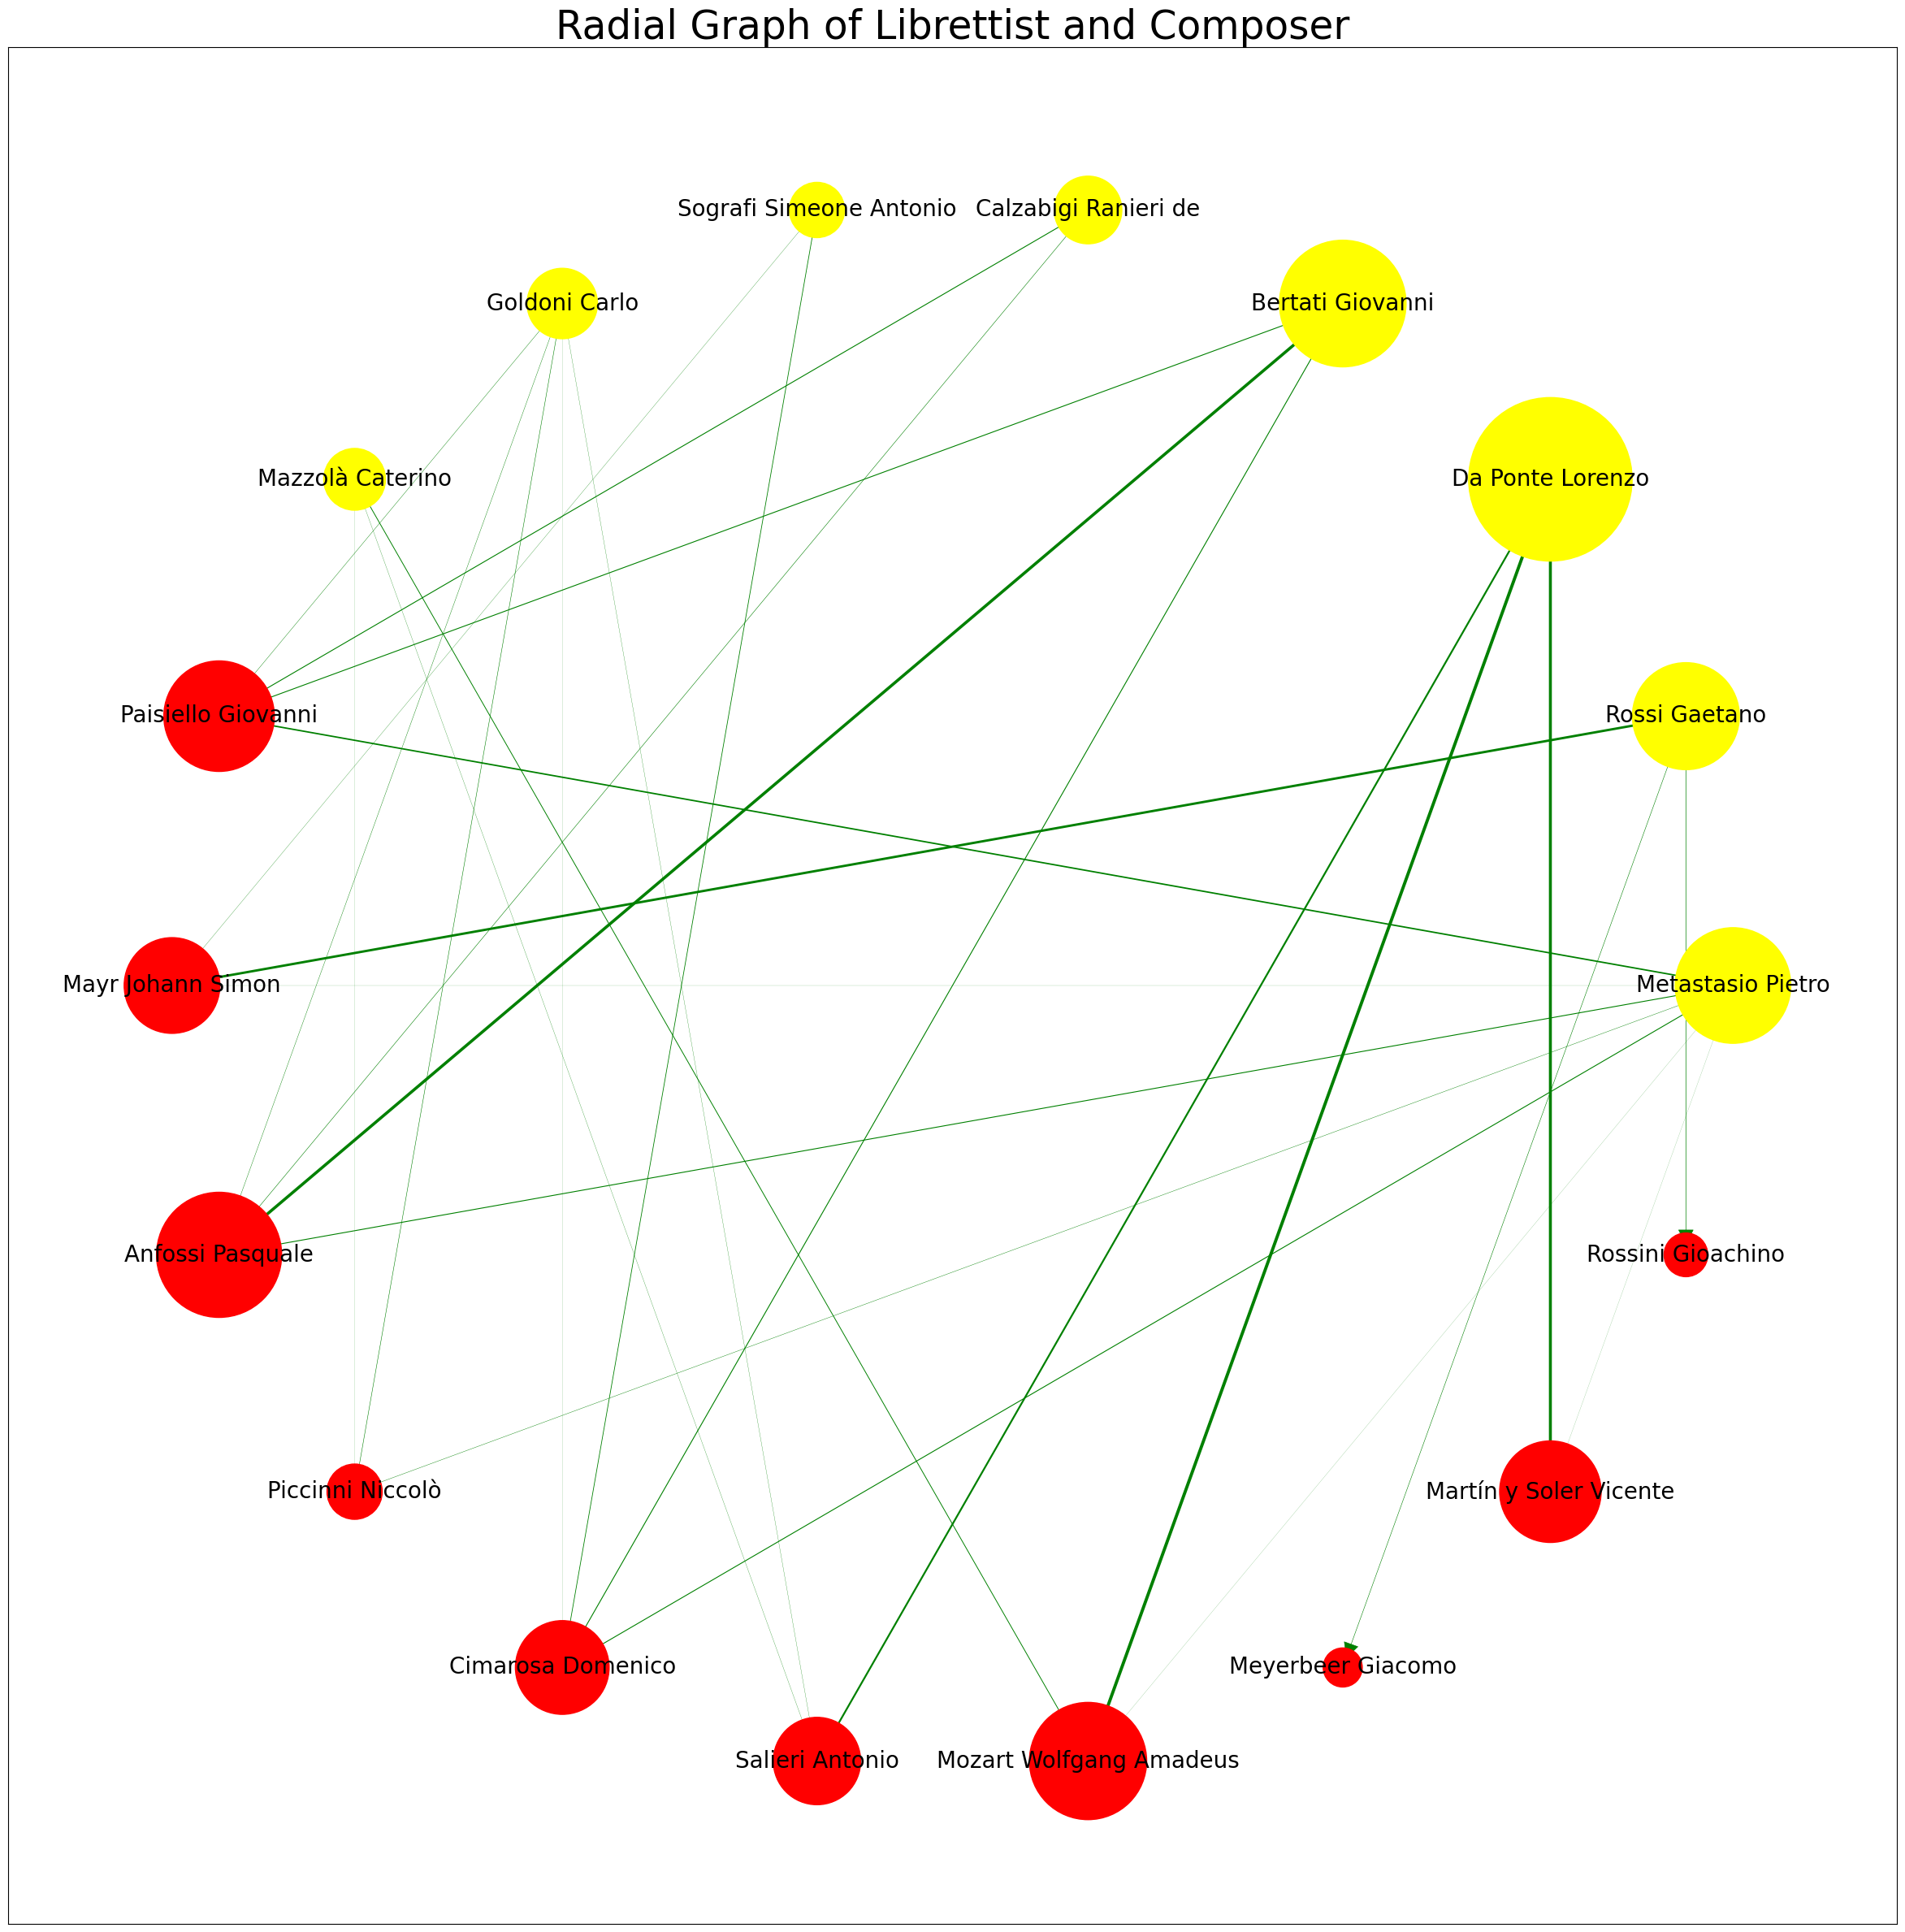

In [12]:
#Radial graph
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
G = nx.DiGraph()
G.add_nodes_from(data['librettist'], bipartite=0)
G.add_nodes_from(data['composer'], bipartite=1)
for i, row in counts.iterrows():
    G.add_edge(row['librettist'], row['composer'], weight=row['counts'])

node_weights = [data[data['librettist'] == node].shape[0] + data[data['composer'] == node].shape[0] for node in G.nodes()]
nx.set_node_attributes(G, values=dict(zip(G.nodes(), node_weights)), name='weight')

pos = nx.circular_layout(G)

librettist_colors = ['yellow']*len(data.librettist.unique())
composer_colors = ['red']*len(data.composer.unique())
node_colors = librettist_colors + composer_colors

# Create list of node sizes based on node weights
node_sizes = [d['weight'] * 300 for node, d in G.nodes(data=True)]

plt.figure(figsize=(30, 30))
plt.title("Radial Graph of Librettist and Composer",size=35)
nx.draw_networkx_edges(G, pos, width=[d['weight']/10 for (u, v, d) in G.edges(data=True)], edge_color='g', arrowsize=32)
labels = {node:node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size = 20)
plt.show()


### Force Directed Graph
In questa sezione vengono mostrati quattro grafi *Force Directed* interattivi:
* Nel primo vengono mostrate le collaborazioni tra **librettisti** (indicati dai *triangoli*) e **compositori** (indicati dai *cerchi*)
* Nel secondo vengono mostrate le **Opere** (indicate dalle *stelle*) realizzate da ogni **compositore** (indicati dai *cerchi*)
* Nel terzo vengono mostrate le **Opere** (indicate dalle *stelle*) realizzate da ogni **librettista** (indicati dai *triangoli*)
* Nel quarto vengono mostrati per ogni **Opera** (indicate dalle *stelle*) i **librettisti** (indicati dai *triangoli*) e **compositori** (indicati dai *cerchi*) che hanno effettuato una performance per quella specifica Opera

In [13]:
#Force directed using pyvis
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["librettist"],shape="triangle")
    G.add_node(row["composer"])
    if row["librettist"] != row["composer"]:
        G.add_weighted_edges_from([(row["librettist"], row["composer"], 1)])


n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("graph.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [14]:
with open("graph.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [15]:
#Force directed using pyvis
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["title"],shape="star")
    G.add_node(row["composer"])
    if row["title"] != row["composer"]:
        G.add_weighted_edges_from([(row["title"], row["composer"], 1)])


n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("grafo.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [16]:
with open("grafo.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [17]:
#Force directed using pyvis
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["title"],shape="star")
    G.add_node(row["librettist"], shape="triangle")
    if row["title"] != row["librettist"]:
        G.add_weighted_edges_from([(row["title"], row["librettist"], 1)])


n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("graph1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [18]:
with open("graph1.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [19]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["librettist"],shape="triangle")
    G.add_node(row["composer"])
    G.add_node(row["title"],shape="star")
    if row["title"] != row["composer"]:
        G.add_weighted_edges_from([(row["title"], row["composer"], 1)])
    if row["title"] != row["librettist"]:
        G.add_weighted_edges_from([(row["title"], row["librettist"], 1)])
    if row["librettist"] != row["composer"]:
        G.add_weighted_edges_from([(row["librettist"], row["composer"], 1)])

n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("grafo1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [20]:
with open("grafo1.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [22]:
#insert geographical coordinates
geocoder = Nominatim(user_agent="my_app")

data["latitude"] = None
data["longitude"] = None

for index, row in data.iterrows():
    city = row["placename"]
    location = geocoder.geocode(city)
    data.at[index, "latitude"] = location.latitude
    data.at[index, "longitude"] = location.longitude
data.to_csv("opera.csv",index=False)

In [23]:
#open geojson file

with open('opera.geojson') as f:
    geo = geojson.load(f)

### Interactive Map
In quest'ultima sezione viene visualizzata una mappa interattiva in cui sono state collocate le performance delle **Opere** nelle diverse **città**. Ogni performance sarà rappresentata da un *markup* con un colore diverso in base al nome del **librettista**:
* Pietro Metastasio: *arancione*
* Gaetano Rossi: *rosso*
* Caterino Mazzolà: *rosa*
* Giovanni Bertrati: *blue*
* Carlo Goldoni: *verde*
* Lorenzo Da Ponte: *arancione*
* Simeone Antonio Sografi: *nero*
* Ranieri De Calzabigi: *white*

Inoltre, cliccando un *markup* apparirà un *pop up* contenente tutte le informazioni relative ad una performance, ovvero:
* Nome dell'**Opera**
* Nome del **compositore**
* Nome del **librettista**
* **Anno di rappresentazione**
* Nome del **luogo**



In [24]:
m = folium.Map(location=[49, 10], zoom_start=3,min_zoom=3,no_wrap=True)

mc = MarkerCluster()

colors = {
    'Metastasio, Pietro': 'purple',
    'Rossi, Gaetano': 'red',
    'Mazzolà, Caterino': 'pink',
    'Bertati, Giovanni': 'blue',
    'Goldoni, Carlo': 'green',
    'Da Ponte, Lorenzo': 'orange',
    'Sografi, Simeone Antonio': 'black',
    'Calzabigi, Ranieri de': 'white'
}

# popup
def format_popup_content(feature):
  return f"""<h3>{feature['properties']['title']}</h3>
            <p><b>Compositore: </b>{feature['properties']['composer']}</p>
            <p><b>Librettista: </b>{feature['properties']['librettist']}</p>
            <p><b>Anno di rappresentazione: </b>{feature['properties']['performance_year']}</p>
            <p><b>Luogo: </b>{feature['properties']['placename']}</p>"""

# marker
for feature in geo['features']:
    composer = feature['properties']['librettist']
    color = colors.get(composer, 'black')
    icon = folium.Icon(color=color)
    mc.add_child(folium.Marker(location=feature['geometry']['coordinates'][::-1],
                                popup=format_popup_content(feature),
                                tooltip=feature['properties']['title'],
                                icon=icon))

m.add_child(mc)

#title
loc = 'Interactive map to display information about each performance'
title_html = '''
             <h2 align="center" style=" color: #000080; font-family: 'Helvetica Neue', sans-serif; font-size: 1; font-weight: bold; letter-spacing: -0.5px; line-height: 1; text-align: center"><b>{}</b></h2>
             '''.format(loc) 

m.get_root().html.add_child(folium.Element(title_html))

m


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d0e5c8f-8726-47cc-be8d-15608be906a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>